In [1]:
import pandas as pd
import folium
import seaborn as sns
import json

In [2]:
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [4]:
df_hospital = pd.read_csv("./hospital.csv", low_memory=False)
df_pool = pd.read_csv("./data/pool.csv",low_memory=False)
df_medi = pd.read_csv("./data/노원구노인의료복지시설.csv",low_memory=False)
df_home = pd.read_csv("./data/노원구노인주거복지시설.csv",low_memory=False)

In [5]:
# p = df_hospital[df_hospital["행정동명"] == "하계2동"]
# p

In [6]:
# 동별 지도화
dongDf = pd.read_csv('./data/old_people.csv', index_col='동')  
dongDf.columns = dongDf.columns.map(str); dongDf
dongDevided = json.load(open( './data/map.json', encoding = 'utf-8'))
df_park = pd.read_csv("./data/park.csv")

In [7]:
p_loc = df_park[["위도", "경도"]].values[:len(df_park)].tolist()
# p_loc

In [8]:
dongMap = folium.Map(location=[df_hospital["위도"].mean(), df_hospital["경도"].mean()], zoom_start = 12.5, 
                   tiles = 'openstreetmap'); dongMap
fmap = folium.Choropleth(geo_data = dongDevided,
                         data = dongDf,
                         columns = ['행정구역', '명'],
                         key_on = 'feature.properties.adm_nm', fill_color='YlOrRd',
                         fill_opacity = 0.7, line_opacity = 0.3,
                         legend_name = '노인 인구수',
                         highlight=True
                         
                        ).add_to(dongMap)

folium.LayerControl().add_to(dongMap)

# m = folium.Map(location=[df_medical["위도"].mean(), df_medical["경도"].mean()], zoom_start = 12.5)

# 병원 
loc = df_hospital[["위도", "경도"]].values[:len(df_hospital)].tolist()
for i in range(len(df_hospital)):
    folium.Circle(location=loc[i], radius=5, color="green", fill = True).add_to(dongMap)

# loc = df_hospital[["위도", "경도"]].values[:len(df_hospital)].tolist()
# for i in range(len(df_hospital)):
#     folium.Marker(location = loc[i], tooltip = df_hospital['상호명'][i],icon = folium.Icon(color = 'blue', icon = 'info-sign')).add_to(dongMap)



# # 공원
# p_loc = df_park[["위도", "경도"]].values[:len(df_park)].tolist()
# for i in range(len(df_park)):
#     folium.Marker(location = p_loc[i], tooltip = df_park['공원명'][i],icon = folium.Icon(color = 'blue', icon = 'info-sign')).add_to(dongMap)

# # 산책로

# # 의료복지시설
# loc = df_medi[["위도", "경도"]].values[:len(df_medi)].tolist()
# for i in range(len(df_medi)):
#     folium.Circle(location=loc[i], radius=5, color="yellow", fill = True).add_to(dongMap)

# p_loc = df_medi[["위도", "경도"]].values[:len(df_medi)].tolist()

# # 주거복지시설

# loc = df_home[["위도", "경도"]].values[:len(df_home)].tolist()
# for i in range(len(df_home)):
#     folium.Circle(location=loc[i], radius=5, color="yellow", fill = True).add_to(dongMap)

# p_loc = df_home[["위도", "경도"]].values[:len(df_home)].tolist()


# #수영장
# loc = df_pool[["위도", "경도"]].values[:len(df_pool)].tolist()
# for i in range(len(df_pool)):
#     folium.Circle(location=loc[i], radius=5, color="blue", fill = True).add_to(dongMap)

# p_loc = df_pool[["위도", "경도"]].values[:len(df_pool)].tolist()

 
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(
     folium.features.GeoJsonTooltip(['adm_nm'],labels = False)
)
dongMap.save('./dongMap.html'); dongMap

상계6.7동    83
공릉1동      36
중계2.3동    36
상계2동      32
월계1동      24
상계1동      24
월계3동      23
중계4동      21
상계8동      21
중계본동      21
중계1동      16
공릉2동      14
월계2동      14
상계3.4동    14
하계1동      13
상계9동      13
하계2동       9
상계5동       8
상계10동      5
Name: 행정동명, dtype: int64

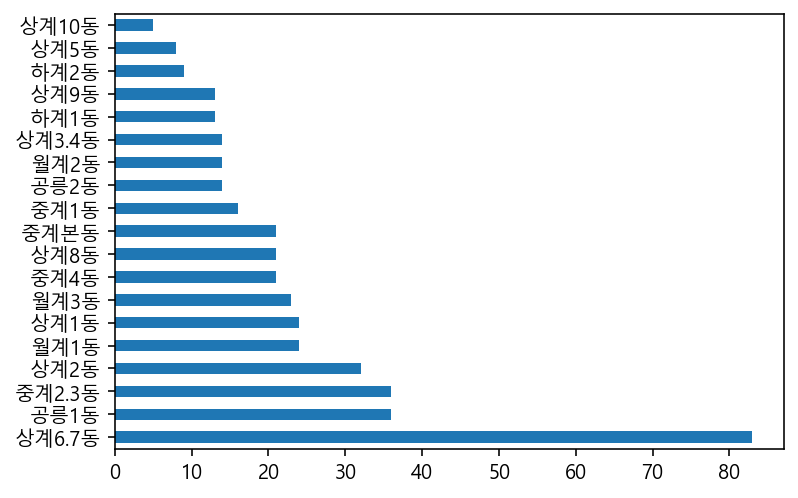

In [9]:
# 병원
df_hospital["행정동명"].value_counts().plot.barh()
df_hospital["행정동명"].value_counts()

In [10]:
# plt.figure(figsize=(11,10))
# sns.scatterplot(data=df_medical, x="경도", y="위도", hue="행정동명")

공릉2동      5
중계2.3동    4
상계6.7동    4
중계1동      2
하계1동      2
상계8동      2
상계9동      1
 상계1동     1
월계1동      1
상계10동     1
월계2동      1
중계4동      1
월계3동      1
Name: 행정동, dtype: int64

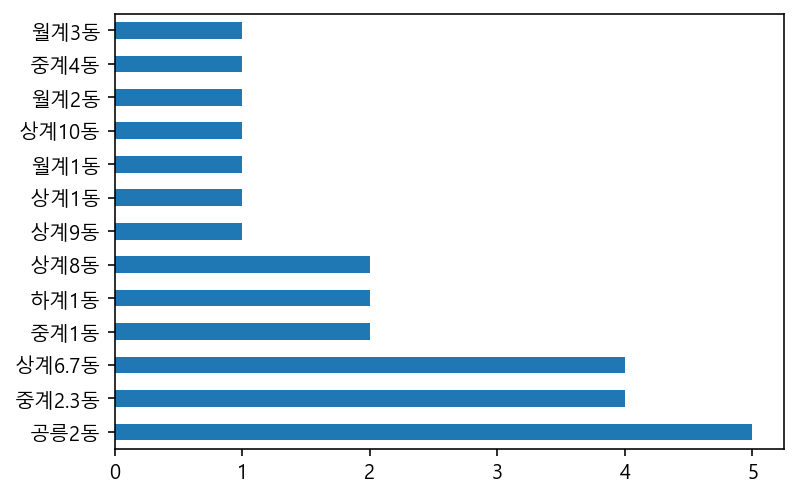

In [11]:
# 공원
df_park["행정동"].value_counts().plot.barh()
df_park["행정동"].value_counts()

In [12]:
# plt.figure(figsize=(11,10))
# sns.scatterplot(data=df_park, x="경도", y="위도", hue="행정동")

중계본동    2
하계1동    2
상계2동    1
월계2동    1
Name: 행정동명, dtype: int64

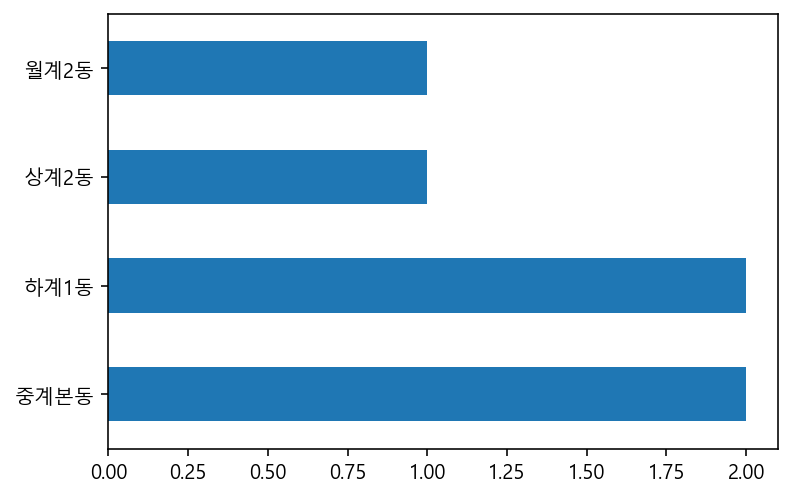

In [13]:
# 수영장
df_pool["행정동명"].value_counts().plot.barh()
df_pool["행정동명"].value_counts()

상계2동      6
상계5동      5
상계9동      4
공릉1동      3
상계10동     2
중계2.3동    1
하계2동      1
월계1동      1
Name: 행정동명, dtype: int64

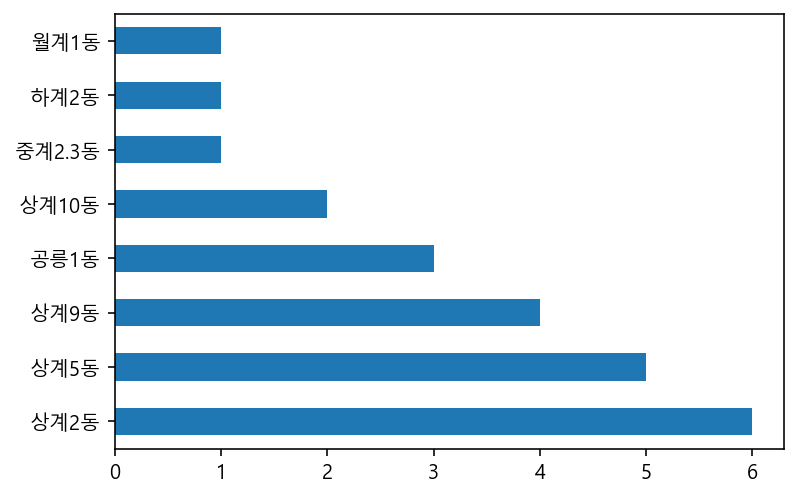

In [14]:
# 의료복지시설
df_medi["행정동명"].value_counts().plot.barh()
df_medi["행정동명"].value_counts()

In [15]:
#  주거복지시설
# df_home["행정동"].value_counts().plot.barh()

In [16]:
# df_ana